In [ ]:
!pip install osmnx pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 17.2 MB/s eta 0:00:00
   ━━━━━

In [2]:
import geopandas as gpd

filez="https://github.com/dacss690d-air/hw2/raw/refs/heads/main/GISDATA.TOWNSSURVEY_POLYM.zip"
gis=gpd.read_file(filez)
gis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   town        1 non-null      object  
 1   town_id     1 non-null      int32   
 2   type        1 non-null      object  
 3   county      1 non-null      object  
 4   fips_stco   1 non-null      int32   
 5   fourcolor   1 non-null      int32   
 6   pop1960     1 non-null      int32   
 7   pop1970     1 non-null      int32   
 8   pop1980     1 non-null      int32   
 9   pop1990     1 non-null      int32   
 10  pop2000     1 non-null      int32   
 11  pop2010     1 non-null      int32   
 12  pop2020     1 non-null      int32   
 13  popch10_20  1 non-null      int32   
 14  area_acres  1 non-null      float64 
 15  area_sqmi   1 non-null      float64 
 16  geometry    1 non-null      geometry
dtypes: float64(2), geometry(1), int32(11), object(3)
memory usage: 224.0+ bytes


In [3]:
gis
gis.crs #projected

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meter)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
print(gis.columns)
cambridge = gis[gis['town'] == 'CAMBRIDGE']

Index(['town', 'town_id', 'type', 'county', 'fips_stco', 'fourcolor',
       'pop1960', 'pop1970', 'pop1980', 'pop1990', 'pop2000', 'pop2010',
       'pop2020', 'popch10_20', 'area_acres', 'area_sqmi', 'geometry'],
      dtype='object')


In [6]:
# getting Cambridge gas stations
import osmnx as ox

gasstations = ox.features_from_place("Cambridge, Massachusetts, USA",
                                tags={'amenity': 'fuel'})

In [8]:
gasstations.info()
# stations unprojected - I don't think this is necessary to include
gasstations.crs
# put current indexes back into the data
gasstations.reset_index(drop=False,inplace=True)
gasstations.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 18 entries, ('node', np.int64(356119414)) to ('way', np.int64(1181215105))
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   geometry                  18 non-null     geometry
 1   amenity                   18 non-null     object  
 2   brand                     13 non-null     object  
 3   brand:wikidata            12 non-null     object  
 4   check_date                5 non-null      object  
 5   compressed_air            12 non-null     object  
 6   fuel:diesel               1 non-null      object  
 7   fuel:octane_87            1 non-null      object  
 8   fuel:octane_89            1 non-null      object  
 9   fuel:octane_93            1 non-null      object  
 10  name                      18 non-null     object  
 11  payment:cash              1 non-null      object  
 12  payment:credit_cards      1 non-null      obj

,element,id,geometry,amenity,brand,brand:wikidata,check_date,compressed_air,fuel:diesel,fuel:octane_87,...,check_date:opening_hours,note,opening_hours:signed,building,roof:colour,landuse,type,opening_hours,phone,operator
0,node,356119414,POINT (-71.13548 42.40105),fuel,Mobil,Q109676002,2025-06-23,yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,1708499129,POINT (-71.09354 42.37296),fuel,Shell,Q110716465,NaN,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,9307559577,POINT (-71.12237 42.39123),fuel,Speedway,Q7575683,NaN,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,9806690295,POINT (-71.11042 42.3692),fuel,NaN,NaN,NaN,yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,11362763501,POINT (-71.09795 42.36179),fuel,Sunoco,Q1423218,2024-09-27,yes,NaN,NaN,...,2023-12-17,Sunoco gas station closed for renovation / con...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
colsToKeep=['element','name','geometry']
fuelCambridge=gasstations[colsToKeep].copy()

In [10]:
# reproject
Cambridge_crs = "EPSG:26986"
fuelCambridge = fuelCambridge.to_crs(Cambridge_crs)

In [11]:
fuelCambridge.info() # checking - but we see that name has missing values here as it does in the tutorial.
fuelCambridge.fillna({'name':'Unknown'},inplace=True)
fuelCambridge.index.astype(str)+"_"+fuelCambridge.name
# creating new names for the gas stations
fuelCambridge['newname']=fuelCambridge.index.astype(str)+"_"+fuelCambridge.name
fuelCambridge.set_index('newname',inplace=True)
fuelCambridge.drop(columns=['name'],inplace=True)
fuelCambridge.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   element   18 non-null     object  
 1   name      18 non-null     object  
 2   geometry  18 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 564.0+ bytes


,element,geometry
newname,,
0_Mobil,node,POINT (230009.042 905679.008)
1_Shell,node,POINT (233477.397 902574.353)
2_Speedway,node,POINT (231093.646 904593.7)
3_John & Nick's,node,POINT (232088.327 902150.783)
4_Sunoco,node,POINT (233119.288 901332.034)


School Data

In [12]:
# get school data
schools = ox.features_from_place("Cambridge, Massachusetts, USA", tags={'amenity':'school'})
schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 45 entries, ('node', np.int64(257580477)) to ('way', np.int64(1411937136))
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   geometry                 45 non-null     geometry
 1   addr:city                17 non-null     object  
 2   addr:housenumber         19 non-null     object  
 3   addr:postcode            17 non-null     object  
 4   addr:state               16 non-null     object  
 5   addr:street              18 non-null     object  
 6   amenity                  45 non-null     object  
 7   attribution              9 non-null      object  
 8   ele                      11 non-null     object  
 9   gnis:feature_id          12 non-null     object  
 10  grades                   6 non-null      object  
 11  massgis:school_id        8 non-null      object  
 12  name                     45 non-null     object  
 13  phon

In [13]:
# reformat
schools.reset_index(inplace=True)
schoolsCambridge=schools[['element','name','geometry']].copy()
schoolsCambridge.fillna({'name':'Unknown'},inplace=True)
schoolsCambridge['newname']=schoolsCambridge.index.astype(str)+"_"+schoolsCambridge.name
schoolsCambridge.set_index('newname',inplace=True)
schoolsCambridge.drop(columns=['name'],inplace=True)
schoolsCambridge = schoolsCambridge.to_crs(Cambridge_crs)
schoolsCambridge.head()

,element,geometry
newname,,
0_Benjamin Banneker Charter Public School,node,POINT (230325.711 904689.691)
1_Castle School Inc,node,POINT (232474.399 902187.747)
2_Cambridge Junior College,node,POINT (230966.973 903942.364)
3_Saint Johns High School,node,POINT (230468.701 902798.822)
4_Haggerty Elementary School,node,POINT (228613.929 903191.859)


In [14]:
# map
base=cambridge.explore(tiles='cartodbpositron',color='lightblue')
schoolsCambridge.explore(m=base,color='k')
fuelCambridge.explore(m=base,color='red')

/tmp/ipython-input-2429786709.py:2: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  base=cambridge.explore(tiles='cartodbpositron',color='lightblue')


Proximity Exploration

In [15]:
#distance among fuel stations
D_Matrix_fuel_fuel=fuelCambridge.geometry.apply\
(lambda station: fuelCambridge.geometry.distance(station))

D_Matrix_fuel_fuel

newname,0_Mobil,1_Shell,2_Speedway,3_John & Nick's,4_Sunoco,5_Citgo,6_Mobil,7_Freshpond Gas,8_Chico's Sunoco,9_Fresh Pond Mobil,10_Jack's Gas,11_Shell,12_Junior's Automotive and Gas,13_Shell,14_Magazine Beach Shell,15_Broadway Gas,16_Shell,17_Shell
newname,,,,,,,,,,,,,,,,,,
0_Mobil,0.000000,4654.930306,1534.360115,4095.339016,5345.074202,2064.886206,4719.169939,1669.298926,1564.102058,1775.881138,197.179531,5421.345487,2312.482846,4348.302396,5223.102324,4502.497152,4638.689452,2058.759536
1_Shell,4654.930306,0.000000,3124.105054,1452.214421,1292.902709,3274.037935,2233.041656,4161.905381,4289.363476,4129.289809,4447.394307,1022.292952,2425.014618,447.877726,2480.740562,754.876896,2192.491070,4178.416208
2_Speedway,1534.360115,3124.105054,0.000000,2637.656863,3839.490889,1181.538413,3381.256250,1593.801141,1649.408455,1641.666107,1329.719798,3925.816216,831.984533,2814.500171,3889.445216,2981.497057,3298.199040,1871.188662
3_John & Nick's,4095.339016,1452.214421,2637.656863,0.000000,1316.522141,2268.486469,981.993729,3145.466345,3287.609138,3077.805461,3909.073425,2458.159210,1784.475034,994.990806,1419.404535,737.029022,911.702141,3055.242479
4_Sunoco,5345.074202,1292.902709,3839.490889,1316.522141,0.000000,3583.967868,1450.321905,4461.842420,4604.061205,4392.852479,5150.502334,1898.890894,3010.507911,1186.218097,1452.136047,868.251244,1443.877538,4362.180309
5_Citgo,2064.886206,3274.037935,1181.538413,2268.486469,3583.967868,0.000000,2710.982606,895.440477,1031.313914,855.462690,1927.786879,4235.407865,977.260429,2852.576581,3203.168855,2858.779016,2632.359331,933.598129
6_Mobil,4719.169939,2233.041656,3381.256250,981.993729,1450.321905,2710.982606,0.000000,3488.673095,3630.351454,3389.881126,4552.746209,3144.149671,2542.565461,1842.806940,508.637905,1460.715209,47.159500,3289.823419
7_Freshpond Gas,1669.298926,4161.905381,1593.801141,3145.466345,4461.842420,895.440477,3488.673095,0.000000,143.251624,106.877084,1617.037903,5109.579319,1781.486613,3745.946667,3958.144777,3752.918446,3412.200186,391.894510
8_Chico's Sunoco,1564.102058,4289.363476,1649.408455,3287.609138,4604.061205,1031.313914,3630.351454,143.251624,0.000000,222.120731,1531.153301,5230.658880,1892.591676,3877.174835,4098.528027,3890.076752,3554.000110,467.116741


In [16]:
# compute minimal distance btwn those gas stations
D_Matrix_fuel_fuel.replace(0,None,inplace=True) # per tutorial - avoid the zero
D_Matrix_fuel_fuel.min(axis=1).sort_values().head(10)

,0
newname,
16_Shell,47.1595
6_Mobil,47.1595
9_Fresh Pond Mobil,106.877084
7_Freshpond Gas,106.877084
8_Chico's Sunoco,143.251624
10_Jack's Gas,197.179531
0_Mobil,197.179531
17_Shell,253.312974
13_Shell,393.009808


In [17]:
# now distance btwn gas stations and schools in Cambridge
D_Matrix_fuel_school=fuelCambridge.geometry.apply\
(lambda station: schoolsCambridge.geometry.distance(station))

D_Matrix_fuel_school

newname,0_Benjamin Banneker Charter Public School,1_Castle School Inc,2_Cambridge Junior College,3_Saint Johns High School,4_Haggerty Elementary School,5_Harvard Divinity School,6_Old Cambridge Baptist Church School,7_St. Paul’s Choir School,8_New England School of Language,9_Cambridge Center for Adult Education,...,35_Fletcher Maynard Academy,36_Graham and Parks School,37_King Open/Cambridge Street Upper School & Community Complex,38_International School of Boston,39_Fayerweather Street School,40_Prospect Hill Academy Charter School,41_High School Extension Program,42_Cambridge-Ellis School,43_Community Charter School of Cambridge,44_New School of Music
newname,,,,,,,,,,,,,,,,,,,,,
0_Mobil,1038.763003,4273.978504,1983.321538,2916.634804,2851.710244,2973.982255,3696.951781,3685.363826,3432.109555,3247.973169,...,4979.595401,2191.251259,4800.541972,227.095169,1834.595143,4663.224952,4187.293102,3512.420620,5515.145539,2838.605369
1_Shell,3795.758239,1074.928324,2858.965912,3017.058720,4902.513130,1788.983099,1705.991821,1836.421835,2141.244487,2320.021211,...,669.616091,2640.543448,154.649357,4505.237698,5356.638693,807.039569,841.009623,1335.438132,860.599037,3278.537896
2_Speedway,773.911218,2774.002306,663.539217,1900.564164,2848.535633,1458.360524,2266.879626,2283.067786,2093.674596,1953.599016,...,3450.077225,882.170972,3271.181995,1410.254930,2584.829625,3145.380305,2669.665772,2002.239377,3984.694921,1964.328378
3_John & Nick's,3090.771466,387.836662,2113.574963,1744.461467,3627.020878,1227.780836,419.543729,493.382177,834.613759,1051.361433,...,1199.061146,1795.597149,1517.669730,4022.306280,4311.316075,793.175993,515.716810,664.613581,2048.364419,1994.115290
4_Sunoco,4367.829207,1071.506746,3383.235949,3029.370147,4874.136719,2381.163702,1735.401386,1803.536459,2138.718117,2357.788677,...,530.839750,3081.566458,1184.025898,5247.419703,5623.836151,659.044424,1083.925628,1761.278772,1203.597765,3266.963574
5_Citgo,1042.792740,2549.753380,652.287246,853.891768,1828.619921,1513.016217,1848.997960,1792.860294,1481.149205,1270.238649,...,3373.454184,537.346930,3424.136232,2093.609545,2088.551576,2990.538759,2548.235124,1912.595697,4089.909748,825.494552
6_Mobil,3682.073090,1225.941440,2771.155840,1950.998449,3614.938251,2106.309024,1175.184502,1117.914205,1295.866968,1471.215025,...,1688.478762,2414.303280,2235.449867,4690.759819,4555.911714,1374.458861,1399.534872,1621.983688,2563.573499,2132.596452
7_Freshpond Gas,965.856396,3439.687682,1381.432601,1539.059872,1308.855496,2385.093936,2727.563810,2660.580392,2334.038517,2116.267182,...,4267.910212,1385.299304,4314.901742,1808.847210,1195.084987,3882.578713,3442.532331,2806.506129,4983.447440,1346.346746
8_Chico's Sunoco,969.714149,3579.073371,1487.259179,1680.120084,1307.017619,2508.194197,2869.420693,2803.208871,2477.084682,2259.388670,...,4404.765642,1507.970671,4443.718602,1723.405482,1035.673325,4021.106405,3579.464772,2938.586110,5114.562172,1481.708015


Identify stations for removal

In [18]:
# starting by sorting distances from lowest to highest
D_Matrix_fuel_school.min(axis=1).sort_values().head(10)

,0
newname,
14_Magazine Beach Shell,34.527707
2_Speedway,95.596692
15_Broadway Gas,152.495076
1_Shell,154.649357
5_Citgo,171.394970
10_Jack's Gas,184.079870
0_Mobil,227.095169
12_Junior's Automotive and Gas,233.897176
3_John & Nick's,241.944154


I will pick a distance of 150m as the buffer.

In [19]:
minDist=150
# create buffer
schoolsCambridge_buffered=schoolsCambridge.buffer(minDist)
schoolsCambridge_buffered

,0
newname,
0_Benjamin Banneker Charter Public School,"POLYGON ((230475.711 904689.691, 230474.989 90..."
1_Castle School Inc,"POLYGON ((232624.399 902187.747, 232623.676 90..."
2_Cambridge Junior College,"POLYGON ((231116.973 903942.364, 231116.251 90..."
3_Saint Johns High School,"POLYGON ((230618.701 902798.822, 230617.978 90..."
4_Haggerty Elementary School,"POLYGON ((228763.929 903191.859, 228763.207 90..."
5_Harvard Divinity School,"POLYGON ((232019.635 903358.93, 232018.913 903..."
6_Old Cambridge Baptist Church School,"POLYGON ((231927.324 902432.374, 231926.601 90..."
7_St. Paul’s Choir School,"POLYGON ((231801.312 902379.788, 231800.589 90..."
8_New England School of Language,"POLYGON ((231486.998 902514.216, 231486.275 90..."


In [21]:
# convert geoseries object into gdf - setting geometry column to buffered geoseries
newschoolsCambridge=gpd.GeoDataFrame(geometry=schoolsCambridge_buffered)
newschoolsCambridge

# counting # of polygons created with the buffers - there are 45
# assigns geometries from schoolsCambridge_buffered to the new gdf
newschoolsCambridge.geometry.geom_type.value_counts()

,count
Polygon,45


Checking points vs polygons in Cambridge

In [22]:
fuelCambridge.geometry.geom_type.value_counts()

,count
Point,8
Polygon,8
MultiPolygon,2


In [27]:
# Make buffer of 10m for every station to ensure selection even if we just have one of the points
fuelCambridge_allPoly=fuelCambridge.copy()
fuelCambridge_allPoly['geometry'] = [station.buffer(10) if
                                     station.geom_type == 'Point' else station
                                  for station in fuelCambridge.geometry]
# check to ensure all stations are polygons
fuelCambridge_allPoly.geometry.geom_type.value_counts()



,count
Polygon,16
MultiPolygon,2


What gas stations need to move?

In [29]:
fuelmove=fuelCambridge_allPoly.sjoin(newschoolsCambridge, how='inner', predicate='intersects')

#check for duplicates
is_dupe=fuelmove.index.duplicated(keep=False)

fuelmove[is_dupe] #there are two

,element,geometry,newname_right
newname_left,,,
2_Speedway,node,"POLYGON ((231103.646 904593.7, 231103.598 9045...",13_New Acropolis
2_Speedway,node,"POLYGON ((231103.646 904593.7, 231103.598 9045...",12_International Language Center


In [33]:
# address duplicates
# put the index as a column, drop duplicates in that column, then set columm back to index
fuelmove=fuelmove.reset_index(drop=False).drop_duplicates(subset='newname_left').\
              set_index('newname_left')

View school buffers & stations to move

In [34]:
base=newschoolsCambridge.sjoin(fuelmove,how='inner',predicate='intersects').explore(color='yellow', tiles='cartodbpositron')
fuelmove.explore(m=base,color='red')

Finding a suitable place for gas stations

In [36]:
place = "Cambridge, Massachusetts, USA"
#street network graph for Cambridge
G = ox.graph_from_place(place, network_type='drive')
# converting those graph edges to gdf
streets = ox.graph_to_gdfs(G, nodes=False, edges=True)

streets.shape
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 4205 entries, (np.int64(61182955), np.int64(61323200), np.int64(0)) to (np.int64(13180559214), np.int64(61321999), np.int64(0))
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   osmid     4205 non-null   object  
 1   highway   4205 non-null   object  
 2   lanes     3948 non-null   object  
 3   maxspeed  3655 non-null   object  
 4   name      4128 non-null   object  
 5   width     3810 non-null   object  
 6   oneway    4205 non-null   bool    
 7   reversed  4205 non-null   object  
 8   length    4205 non-null   float64 
 9   geometry  4205 non-null   geometry
 10  ref       391 non-null    object  
 11  access    88 non-null     object  
 12  junction  21 non-null     object  
 13  bridge    27 non-null     object  
 14  tunnel    4 non-null      object  
dtypes: bool(1), float64(1), geometry(1), object(12)
memory usage: 643.1+ KB


In [37]:
# focus on highways
streets.highway.value_counts().index

Index([                  'residential',                       'primary',
                            'tertiary',                     'secondary',
                               'trunk',                  'unclassified',
                          'trunk_link',                  'primary_link',
                       'living_street',                        'busway',
                      'secondary_link',                 'tertiary_link',
          ['tertiary', 'unclassified'], ['residential', 'unclassified'],
                       'motorway_link'],
      dtype='object', name='highway')

In [38]:
# must find suitable places (driveable routes)
GAS_STATION_ROAD_TYPES = [
    'motorway',      # High-speed limited access roads
    'primary',       # Major national roads
    'trunk',         # Important regional roads
    'motorway_link', # Motorway entrance/exit ramps
    'primary_link',  # Primary road connectors
    'trunk_link',     # Trunk road connectors
    ['motorway', 'trunk'],
    ['primary', 'motorway_link'],
    ['primary', 'primary_link']
]

suitable_roads = streets[streets.highway.isin(GAS_STATION_ROAD_TYPES)]

suitable_roads.shape

(871, 15)

In [39]:
#reprojecting
suitable_roads = suitable_roads.to_crs(cambridge.crs)

In [40]:
# new locations with buffers around gas stations
competitorDistance=150
fuelCambridge_allPoly_buffered=fuelCambridge_allPoly.buffer(competitorDistance)

In [42]:
type(fuelCambridge_allPoly_buffered) # this is a geoseries
# convert to gdf
secured_fuelCambridge_allPoly=gpd.GeoDataFrame(geometry=fuelCambridge_allPoly_buffered)


Now we combine the secured areas and filter out the roads.

In [43]:
secured_areas_dissolved=secured_fuelCambridge_allPoly.overlay(newschoolsCambridge,how='union',keep_geom_type=False).dissolve()
secured_areas=gpd.GeoDataFrame(geometry=secured_areas_dissolved.geometry)

<Axes: >

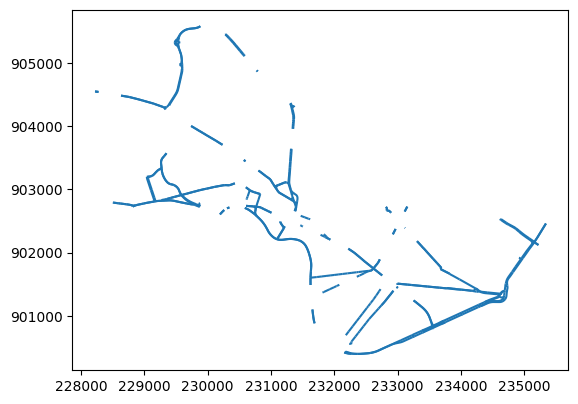

In [44]:
# use overlay for filtering roads
suitable_roads.overlay(secured_areas, keep_geom_type=False, how='difference').plot()

In [45]:
# prepare fuelCambridge gdf and make sure all gas station geometries are polygons
# check if each gas station geometry column type is Point, then create 10m buffer
good_routes_forGas_dissolved=suitable_roads.overlay(secured_areas,keep_geom_type=False, how='difference').dissolve()
good_routes_forGas=gpd.GeoDataFrame(geometry=good_routes_forGas_dissolved.geometry)
good_routes_forGas

,geometry
0,"MULTILINESTRING ((232183.383 900696.854, 23222..."


<Axes: >

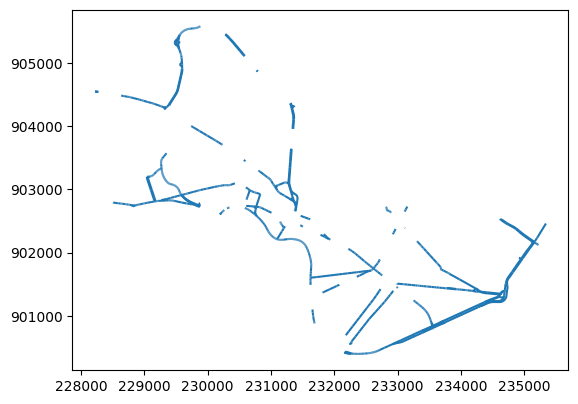

In [46]:
#plot

good_routes_forGas.plot()

Choosing Potential Locations

In [49]:
potential_locations=good_routes_forGas.copy()


In [53]:
newPOLYGONS=[]
pointsComputed=1
attempts=1
while pointsComputed<=len(fuelmove):
  candidatePoint=potential_locations.sample_points(1)
  candidateStation=gpd.GeoDataFrame(geometry=candidatePoint.buffer(150))
  if candidateStation.overlay(secured_areas,how='intersection',keep_geom_type=False).empty:
    newPOLYGONS.append(candidateStation)
    pointsComputed+=1
    potential_locations=potential_locations.overlay(candidateStation, how='difference', keep_geom_type=False)
  if attempts>len(fuelmove)*10:
    break
  attempts+=1

In [54]:
# randomly selecting points from the suitable roads, creates 100m buffer, and checks for site overlaps with secured areas
attempts, len(newPOLYGONS)

(4, 3)

In [55]:
newPOLYGONS

[                                            geometry
 0  POLYGON ((228683.322 902788.605, 228682.6 9027...,
                                             geometry
 0  POLYGON ((233394.547 900682.072, 233393.825 90...,
                                             geometry
 0  POLYGON ((233831.269 901744.73, 233830.547 901...]

In [57]:
# combine all indv gdf objects stored in newPOLYGONS into a single gdf
import pandas as pd
pd.concat(newPOLYGONS)

,geometry
0,"POLYGON ((228683.322 902788.605, 228682.6 9027..."
0,"POLYGON ((233394.547 900682.072, 233393.825 90..."
0,"POLYGON ((233831.269 901744.73, 233830.547 901..."


In [58]:
GoodLocationsGas_buffered_gdf=pd.concat(newPOLYGONS)
GoodLocationsGas_gdf=gpd.GeoDataFrame(geometry=GoodLocationsGas_buffered_gdf.centroid)

<Axes: >

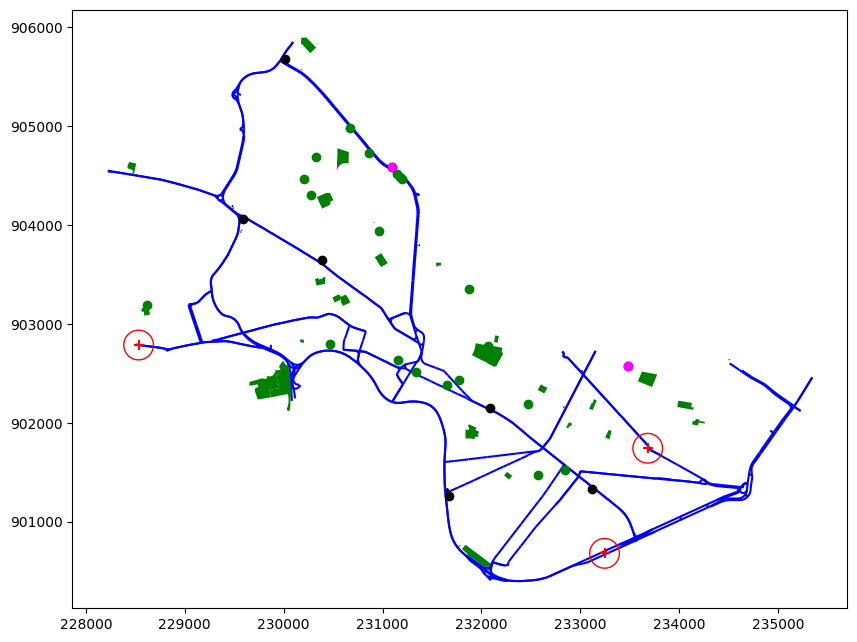

In [60]:
# now plotting:
# original suitable roads
base = suitable_roads.plot(color='blue', figsize=(10, 10),zorder=1)

# non-overlapping buffers
GoodLocationsGas_buffered_gdf.plot(ax=base, edgecolor='red', marker="+", facecolor='none',zorder=2)

# center points of the buffers
GoodLocationsGas_gdf.plot(ax=base, color='red', marker="+", markersize=50,zorder=3)

# all stations
fuelCambridge.plot(ax=base,color='k',zorder=4)
schoolsCambridge.plot(ax=base,color='green',zorder=5)

# stations to relocate
fuelCambridge.clip(fuelmove).plot(ax=base,color='magenta',zorder=5)


Reverse Geocoding

In [61]:
# get addresses
from geopy.geocoders import Nominatim
import time

# Initialize geocoder
geolocator = Nominatim(user_agent="cambridge_gas_stations")

def get_address(point):
  lon = point.x
  lat = point.y
  location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
  time.sleep(1)  # Rate limiting

  if location:
    return location.address
  else:
    return None # not found

GoodLocationsGas_4326 = GoodLocationsGas_gdf.to_crs('EPSG:4326')
GoodLocationsGas_gdf['address'] = GoodLocationsGas_4326.geometry.apply(get_address)

GoodLocationsGas_gdf

,geometry,address
0,POINT (228533.322 902788.605),"74;76, Belmont Street, Cambridge, Middlesex Co..."
0,POINT (233244.547 900682.072),"Memorial Drive, Cambridge, Middlesex County, M..."
0,POINT (233681.269 901744.73),"Draper Labs/ Schlumberger, 1, Hampshire Street..."


Now we have good locations for the gas stations with reasonable buffers from schools that can be traveled to via suitable roads.

In [69]:
# export data from here to R for flexdashboard
fuelCambridge.to_file('cambridge_analysis.gpkg', layer='fuel_stations', driver='GPKG')
schoolsCambridge.to_file('cambridge_analysis.gpkg', layer='schools', driver='GPKG')
suitable_roads.to_file('cambridge_analysis.gpkg', layer='suitable_roads', driver='GPKG')
GoodLocationsGas_buffered_gdf.to_file('cambridge_analysis.gpkg', layer='gas_buffered', driver='GPKG')
GoodLocationsGas_gdf.to_file('cambridge_analysis.gpkg', layer='gas_centers', driver='GPKG')
fuelCambridge.clip(fuelmove).to_file('cambridge_analysis.gpkg', layer='fuelmove', driver='GPKG')
cambridge.to_file('cambridge_analysis.gpkg', layer='cambridge', driver='GPKG')

In [70]:
from google.colab import files
files.download('cambridge_analysis.gpkg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>